# Homework 2
# Moiya Josephs


In [120]:
import pandas
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pandas.read_csv("student_sleep_patterns.csv")

df.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


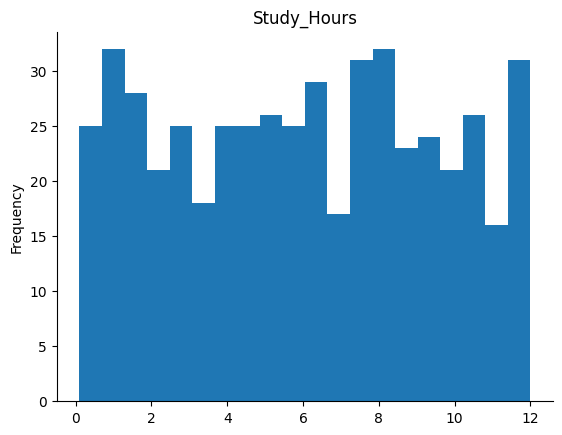

In [ ]:
# @title Study_Hours

from matplotlib import pyplot as plt
df['Study_Hours'].plot(kind='hist', bins=20, title='Study_Hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

The number of study hours varies between 0 to 12 hours with no general trend (increase or decrease) or curve to the distribution of sleep.

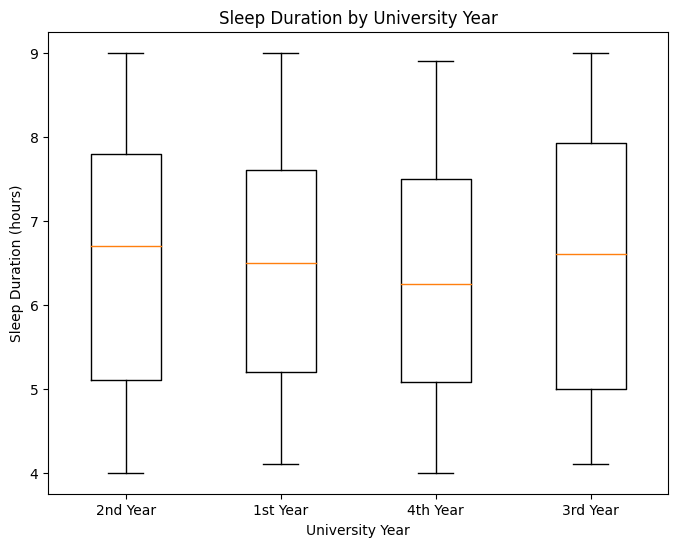

In [ ]:
# @title Sleep Duration by University Year

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'

plt.figure(figsize=(8, 6))
plt.boxplot([df[df['University_Year'] == year]['Sleep_Duration'] for year in df['University_Year'].unique()], labels=df['University_Year'].unique())
plt.xlabel('University Year')
plt.ylabel('Sleep Duration (hours)')
_ = plt.title('Sleep Duration by University Year')

The hours of sleep between the different univerity years are similar between the groups with no obvious outliers.

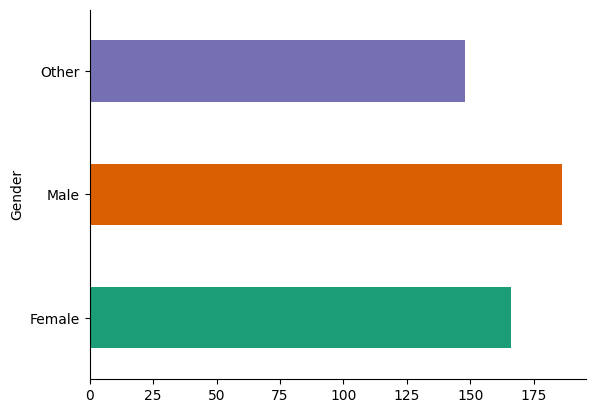

In [ ]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

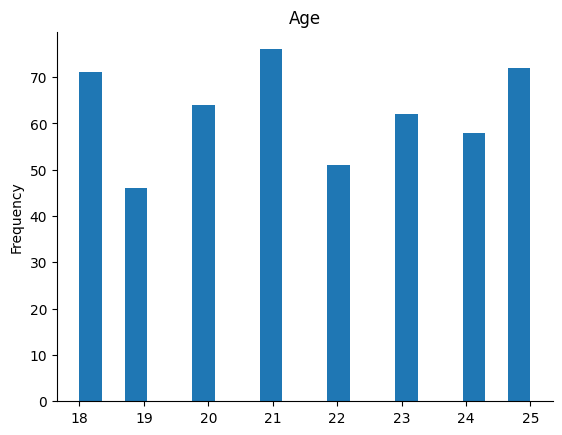

In [ ]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Decision Tree


To make a decision tree, all data has to be numerical. To accomplish this in Python I will utilize the map function.

In [121]:
gender_map = {'Male': 0, 'Female': 1, 'Other': 2}
df['Gender'] = df['Gender'].map(gender_map)

university_map = {'1st Year': 0, '2nd Year': 1, '3rd Year': 2, '4th Year': 3}
df['University_Year'] = df['University_Year'].map(university_map)




In [122]:
features = df.columns.tolist()
# Remove unique identifiers
features.remove('Student_ID')
# Remove dependent variable
features.remove('Sleep_Quality')



In [123]:
X = df[features]
y = df['Sleep_Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [124]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

### Decision Tree 1

In [125]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [86]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_11 <= 8.93
|   |--- feature_4 <= 2.95
|   |   |--- feature_3 <= 8.10
|   |   |   |--- feature_8 <= 6.15
|   |   |   |   |--- feature_8 <= 5.05
|   |   |   |   |   |--- feature_7 <= 72.50
|   |   |   |   |   |   |--- feature_10 <= 8.02
|   |   |   |   |   |   |   |--- feature_9 <= 8.10
|   |   |   |   |   |   |   |   |--- class: 8
|   |   |   |   |   |   |   |--- feature_9 >  8.10
|   |   |   |   |   |   |   |   |--- feature_7 <= 33.50
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |--- feature_7 >  33.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 23.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_0 >  23.00
|   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- feature_10 >  8.02
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_7 >  72.50
|   |   |   |   |   |   |--- feature_9 <= 16.19
|   |   |   |   |   |   |   |---

In [126]:
# Predicting
pred = dtree.predict(X_test)

# Evaluating variance
Variance = np.var(pred)

# Evaluating SSE
SSE = np.mean((np.mean(pred) - y_test)** 2)
# Evaluating Variance
Bias = SSE - Variance

print("Variance:", Variance)
print("SSE:", SSE)
print("Bias:", Bias)

Variance: 7.902222222222222
SSE: 8.967555555555554
Bias: 1.0653333333333324


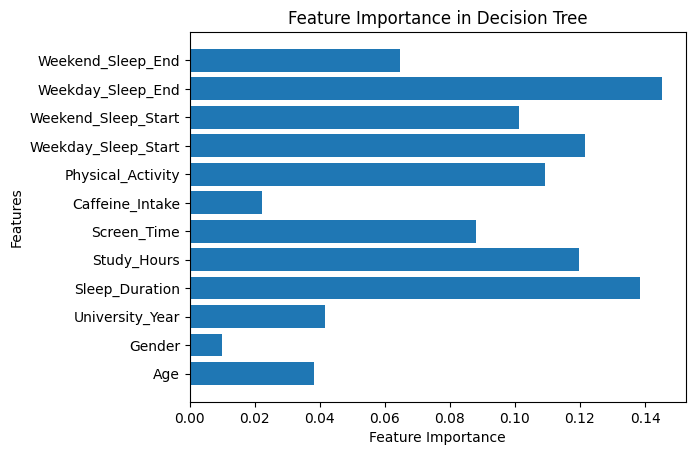

In [127]:
# Plotting feature importances
importances = dtree.feature_importances_
features = X_train.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()

### Decision Tree 2

In [96]:
features = df.columns.tolist()
# Remove unique identifiers
features.remove('Student_ID')
features.remove('Caffeine_Intake')
features.remove('Age')
features.remove('Gender')


# Remove dependent variable
features.remove('Sleep_Quality')
X = df[features]
y = df['Sleep_Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
# Predicting
pred = dtree.predict(X_test)

# Evaluating variance
Variance = np.var(pred)

# Evaluating SSE
SSE = np.mean((np.mean(pred) - y_test)** 2)
# Evaluating Variance
Bias = SSE - Variance

print("Variance:", Variance)
print("SSE:", SSE)
print("Bias:", Bias)

Variance: 8.168888888888889
SSE: 8.958666666666666
Bias: 0.7897777777777772


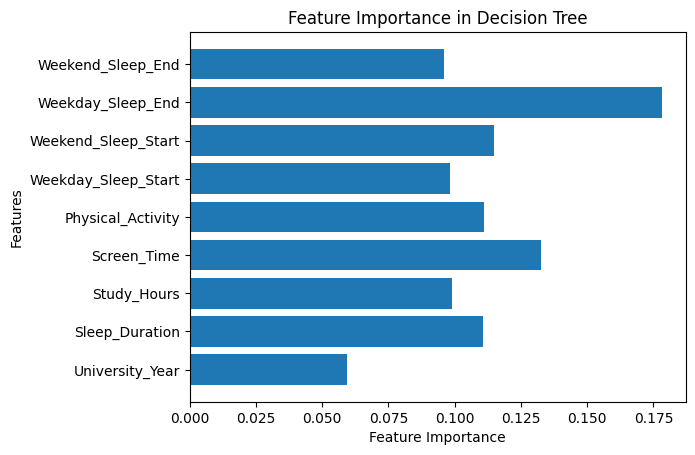

In [97]:
# Plotting feature importances
importances = dtree.feature_importances_
features = X_train.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()

In [128]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_11 <= 8.93
|   |--- feature_4 <= 2.95
|   |   |--- feature_3 <= 8.10
|   |   |   |--- feature_8 <= 6.15
|   |   |   |   |--- feature_8 <= 5.05
|   |   |   |   |   |--- feature_7 <= 72.50
|   |   |   |   |   |   |--- feature_3 <= 5.10
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- feature_3 >  5.10
|   |   |   |   |   |   |   |--- feature_9 <= 8.10
|   |   |   |   |   |   |   |   |--- class: 8
|   |   |   |   |   |   |   |--- feature_9 >  8.10
|   |   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_9 <= 14.84
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_9 >  14.84
|   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- feature_7 >  72.50
|   |   |   |   |   |   |--- feature_7 <= 97.00
|   |   |   |   |   |   |   |--- cla

### Decision Tree 3

In [114]:
features = df.columns.tolist()
# Remove unique identifiers
features.remove('Student_ID')


# Remove dependent variable
features.remove('Sleep_Quality')
X = df[features]
y = df['Sleep_Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dtree = DecisionTreeClassifier(splitter="random",random_state=42)
dtree = dtree.fit(X_train, y_train)

The "Random" setting selects a feature at random, then splits it at random and calculates the gini. It repeats this a number of times, comparing all the splits and then takes the best one.

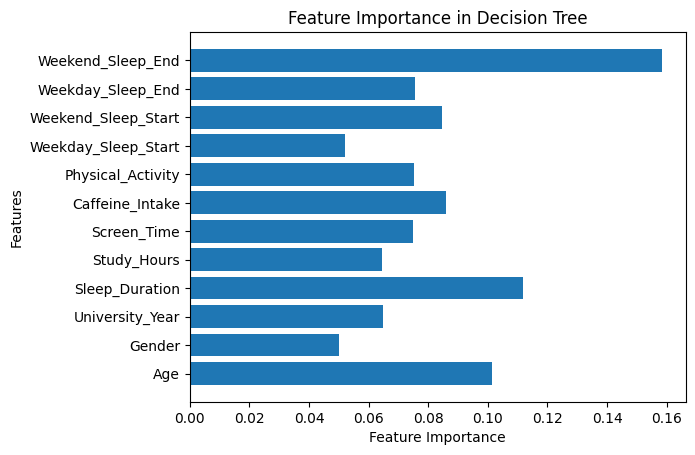

In [116]:
# Plotting feature importances
importances = dtree.feature_importances_
features = X_train.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()

In [117]:
# Predicting
pred = dtree.predict(X_test)

# Evaluating variance
Variance = np.var(pred)

# Evaluating SSE
SSE = np.mean((np.mean(pred) - y_test)** 2)
# Evaluating Variance
Bias = SSE - Variance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Variance:", Variance)
print("SSE:", SSE)
print("Bias:", Bias)

Accuracy: 0.11333333333333333
Variance: 8.835555555555556
SSE: 9.111555555555556
Bias: 0.2759999999999998


### Decision Tree 4

In [118]:
# Create and train a pruned Decision Tree with pre-pruning techniques
tree = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=5, random_state=0)
tree.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree.predict(X_test)
# Evaluating variance
Variance = np.var(y_pred)

# Evaluating SSE
SSE = np.mean((np.mean(pred) - y_test)** 2)
# Evaluating Variance
Bias = SSE - Variance
print("Accuracy:", accuracy_score(y_test, y_pred))


print("Variance:", Variance)
print("SSE:", SSE)
print("Bias:", Bias)

Accuracy: 0.11333333333333333
Variance: 7.81888888888889
SSE: 9.111555555555556
Bias: 1.2926666666666664


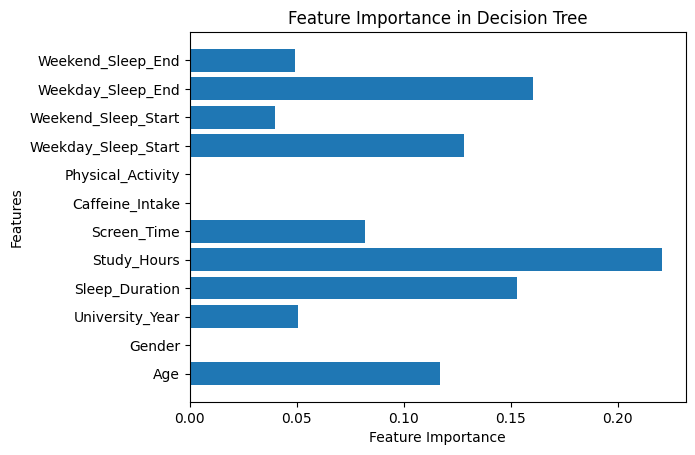

In [119]:
# Plotting feature importances
importances = tree.feature_importances_
features = X_train.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()

## Random Forest


In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

features = df.columns.tolist()
# Remove unique identifiers
features.remove('Student_ID')
# Remove dependent variable
features.remove('Sleep_Quality')
X = df[features]
y = df['Sleep_Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Evaluating variance
Variance = np.var(y_pred)

# Evaluating SSE
SSE = np.mean((np.mean(y_pred) - y_test)** 2)
# Evaluating Variance
Bias = SSE - Variance

print("Variance:", Variance)
print("SSE:", SSE)
print("Bias:", Bias)

Accuracy: 0.09333333333333334
Classification Report:
               precision    recall  f1-score   support

           1       0.16      0.30      0.21        20
           2       0.00      0.00      0.00        16
           3       0.06      0.06      0.06        16
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        12
           6       0.14      0.15      0.15        20
           7       0.14      0.11      0.12         9
           8       0.14      0.07      0.09        15
           9       0.09      0.14      0.11        14
          10       0.00      0.00      0.00        16

    accuracy                           0.09       150
   macro avg       0.07      0.08      0.07       150
weighted avg       0.08      0.09      0.08       150

Variance: 9.92426666666667
SSE: 9.33626666666667
Bias: -0.5879999999999992


In [138]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid,
    n_iter=50,               # Number of random combinations to try
    scoring='accuracy',       # Scoring metric (for classification)
    cv=5,                     # 5-fold cross-validation
    random_state=0,
    n_jobs=-1                 # Use all available CPU cores
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 70, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20, 'bootstrap': False}
Best Cross-Validation Score: 0.11714285714285713


Once I identified a promising range of hyperparameters from RandomizedSearchCV, I can further fine-tune using GridSearchCV, which tests all possible combinations within the specified parameter grid.

In [143]:
from sklearn.model_selection import GridSearchCV

# Narrow down the parameter grid based on RandomizedSearchCV results
param_grid = {
    'n_estimators': [60, 70, 80, 90],          # Narrow range around 70
    'max_depth': [15, 20, 25],                 # Narrow range around 20
    'max_features': [None],                    # Keeping this as None
    'min_samples_split': [8, 10, 12],          # Narrow range around 10
    'min_samples_leaf': [1, 2],                # Test slightly higher leaf sizes
    'bootstrap': [False]                       # Keeping this as False
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'bootstrap': False, 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 60}
Best Cross-Validation Score: 0.11714285714285713


In [144]:
# Train the optimized Random Forest model
optimized_rf = RandomForestClassifier(**grid_search.best_params_, random_state=0)
optimized_rf.fit(X_train, y_train)

# Evaluate on the test set
y_pred = optimized_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.11333333333333333


In [145]:
# Evaluating variance
Variance = np.var(y_pred)

# Evaluating SSE
SSE = np.mean((np.mean(y_pred) - y_test)** 2)
# Evaluating Variance
Bias = SSE - Variance

print("Variance:", Variance)
print("SSE:", SSE)
print("Bias:", Bias)

Variance: 8.814622222222223
SSE: 9.453555555555555
Bias: 0.6389333333333322


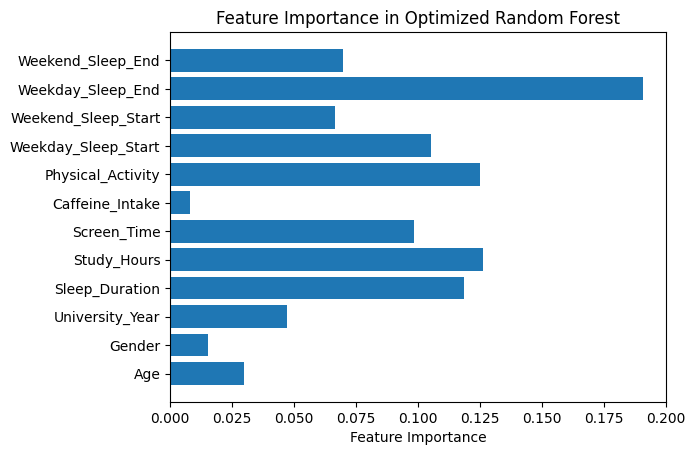

In [146]:
# Feature importances
importances = optimized_rf.feature_importances_
features = X_train.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Optimized Random Forest")
plt.show()

## Conclusion and Essay

My conclusive analysis shows the improvements that can be made when using a decision tree for a classification problem.

As the tree depth increases:

*   Low Depths (High Bias): High error for both training and testing sets.
*   High Depths (High Variance): Low training error, but testing error increases due to overfitting.

In both cases we see a high variance but a low bias therefore these models are overfitting the data.
Variance represents the error due to the model’s sensitivity to small fluctuations in the training set. High variance usually occurs in models that are too complex, capturing noise along with the actual data patterns, resulting in overfitting. Overfitting happens when the model is too flexible and adapts to every detail of the training data, including noise, which reduces its generalizability.
A decision tree with many levels (depths) might exhibit high variance because it makes many specific splits, fitting very closely to the training data—even noise—thus performing poorly on unseen data.

Decision Tree one I did no tuning or pruning to the model. The results are as shown below. The high variance shows the model overfit the data. The visual output showed the tree grew quite large which could explain the variance.

* Variance: 7.902222222222222
* SSE: 8.967555555555554
* Bias: 1.0653333333333324

In Decision Tree 2 I removed least important features from the tree and switched variables. This increased the variance but decreased the bias.

* Variance: 8.168888888888889
* SSE: 8.958666666666666
* Bias: 0.7897777777777772

In Decision Tree 3, split using the random parameter in the decsion tree did not improve the score of the variance or the bias.
*  Accuracy: 0.11333333333333333
* Variance: 8.835555555555556
* SSE: 9.111555555555556
*  Bias: 0.2759999999999998


Decsion Tree 4had the best vairance and bias output of the decision tree models. By pruning I was able to reduce the overfitting of the models.
* Accuracy: 0.11333333333333333
* Variance: 7.81888888888889
* SSE: 9.111555555555556
* Bias: 1.2926666666666664

As mentioned in the blog, decision trees are often criticized for overfitting, sensitivity to small data changes, and interpretability challenges, which can make them unreliable in real-world applications. The blog desciribed multiple problems with decsion trees which I attempted to solve for in my code above.

As shown in my decsion trees, due to the complexity of the dataset the models showed overfitting even when splitting on different variables. To solve the overfitting problem, using random forests or pruning the decsion tree can reduce this problem. Decision trees can be pruned by stopping the tree from growing to a certain depth by setting the parameters of the code. Pre-Pruning is generally faster because it stops the growth early, but may risk underfitting if constraints are too strict. When I prepruned the data the Bias did increase and the Variance did decrease but not ny a significant amount.

Additionally, due to the nature of the dataset the decsion tree became visually hard to represent and therefore interpret. Decision trees can become complex and hard to interpret, but using feature importance metrics and visualizations. In the code above I utilzied tools like feature importance to highlight the important decision making variables in the dode above. Pruning the tree will also helo the tree from increasing to an unusable size.

Decision trees are also sensitive to smaller datasets. Techniques like cross validation, ensembling and bootstrapping with Random Forest allow the code to be more predictable with stable predictions. The Random Forest that the code produced above in terms of variance showed a higher vairance and a lower bias but not by a significant amount. Infuture iterations I would use other boosting methods to improve the performance of the random forest and eliminate unimportant features that are impeding the models performance. By removing certain features I would improve the quality and relevance of featuresand provide the algorithm with more informative data, leading to better predictions and accuracy.